# Problema do Alinhamento de Sequencias de DNA
## Uma abordagem sobre o desempenho de diferentes algoritmos
### Aluno: Marcelo Cesário Miguel

#### imports

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Análise com Smith Waterman e Random Local Search

In [2]:
df = pd.DataFrame(columns=['Saida','Tempo','n','Algoritmo'])

list_alg = {'./main' : 'Smith Waterman','./random_local_search/main' : 'Random Local Search'}

def get_list_program(list_alg, n_,step):
    list_execute=[]
    for i in list_alg:
        for j in np.arange(1,n_,step):
            f = open(f'inputs_generator/in{j}.txt',"r")
            contents = f.read()
            f.close()
            n = contents.split()[0]
            m = contents.split()[1]
            start = time.perf_counter()
            proc = subprocess.run([i], input=contents, text=True, capture_output=True)
            end = time.perf_counter()
#             print(str(i)+" "+str(j))
#             print("time "+str(float(end-start)))

    #         print(lista_program[i])
    #         print(j)
    #             print('Saída:', proc.stdout)
    #         print("value", proc.stdout.split()[-1])
    #         print('Stderr:', proc.stderr)
    #         print('Tempo total(s):', end - start)
            algoritmo = list_alg[i]
            dic = {
                'Tempo':float(end-start),
                'Saida':int(proc.stdout.split()[-1]),
                'n': int(n),
                'm': int(m),
                'Algoritmo': algoritmo
            }
            list_execute.append(dic)
    return list_execute

In [3]:
# Para rodar esse comando, é necessário rodar o arquivo mysequenceGenerator.py
# dentro da pasta inputs_generator
list_execute = get_list_program(list_alg,750,10)


In [4]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

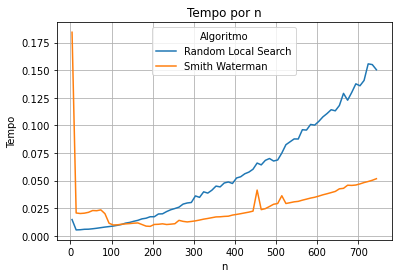

In [5]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

### Alterando o tempo do Random Local Search
Como o algoritmo de busca local do código Random Local Search é repetido 100 vezes para cada 'n', será dividido em 100 o tempo do Random Local Search para calcularmos apenas o tempo do algoritmo de busca local

In [6]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

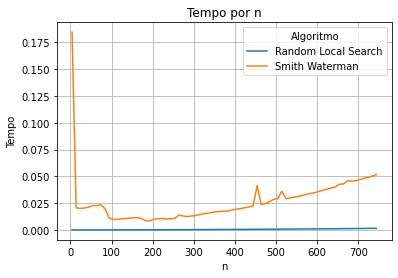

In [7]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

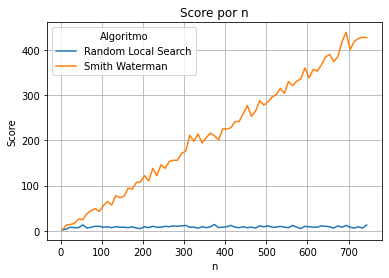

In [8]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");




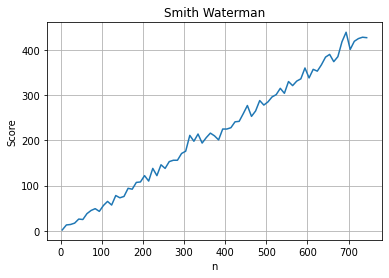

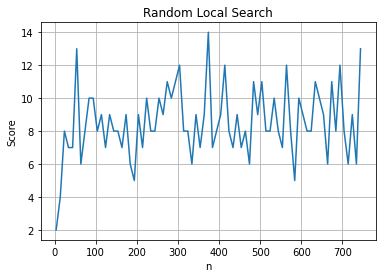

In [9]:
df.pivot(index='n',columns='Algoritmo',values='Saida')['Smith Waterman'].plot();
plt.title("Smith Waterman")
plt.grid()
plt.ylabel("Score");
plt.show()
df.pivot(index='n',columns='Algoritmo',values='Saida')['Random Local Search'].plot();
plt.title("Random Local Search")
plt.grid()
plt.ylabel("Score");
plt.show()

### Adicionando Exaustive Search

In [10]:
list_alg_exaust = {'./main' : 'Smith Waterman',
                   './random_local_search/main' : 'Random Local Search',
                   './exaustive_search/main':'Exaustive Search'}

In [18]:
print("Esse código pode demorar alguns minutos")
list_execute = get_list_program(list_alg_exaust,300,10)

Esse código pode demorar alguns minutos


In [19]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [20]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

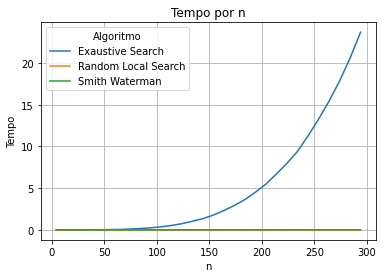

In [21]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

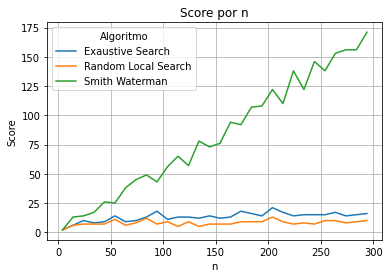

In [22]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

### Analisando variações no tempo do algoritmo smith

In [16]:
def plot_corr(x_,y_,title):
    sns.regplot(x_,y_, color=('#a29bec'))
    plt.title(title)
    plt.grid(True)
    plt.show()

In [17]:
df_teste = df.loc[(df['n']<500) & (df['Algoritmo']== 'Smith') & (df['n']%10 == 0) ]

df_teste.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Tempo");
for i in np.arange(0,len(df_teste),1):
    plt.annotate(str(df_teste.iloc[i]["Saida"]),xy=(df_teste.iloc[i]["n"],df_teste.iloc[i]["Tempo"]))

TypeError: no numeric data to plot

### Correlação da diferença |n-m| e o tempo

In [ ]:
df['|n-m|'] = ((df['n'] - df['m'])**2)**(1/2)

In [ ]:
df['|n-m|']

In [ ]:
df_smith = df.loc[df['Algoritmo']=='Smith']
plot_corr(df_smith['|n-m|'],df_smith['Tempo'],"Correlação |n-m| por Tempo")

In [ ]:
df_smith['Tempo'].corr(df_smith['|n-m|'])